## Problem Definition 

The goal of this project was to analyze conversion rates using bank digital marketing data.

### Import Python libraries and data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Exploratory Data Analysis and Feature Engineering 

In [3]:
data.shape

(41188, 21)

Our Output variable (desired target)is y:

y - has the client subscribed a term deposit? (binary: 'yes','no'). To simplify our conversion rates computation, we will encode the variable as 1 for 'yes' and 0 for 'no'.

In [4]:
data['conversion'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


Let's calculate the aggregate conversion rate. We can calculate this metric by dividing the total number of clients subscribed to a term deposit by the total number of clients in the data. We can simply sum over the conversion column to get the total number of conversions.

data.shape[0] gives us the total number of rows in the data

In [6]:
#total number of conversions
print('Total conversions: %i out of %i' % (data.conversion.sum(), data.shape[0]))

Total conversions: 4640 out of 41188


In [7]:
print('Conversion rate: %0.2f%%' % (data.conversion.sum() / data.shape[0] * 100))

Conversion rate: 11.27%


As we can see, we have 4640 converted clients out of a total of 41188 bank clients, which gives us an aggregate conversion rate of 11.27%. Aggregate conversion rate tell us the overall performance of our marketing campaign. However, it does not give us that much insight. We want to dive deeper into the data and break down the customer base into multiple segments and compute KPIs for individual segments. 

We will first break our data into smaller segments by age and see how the conversion rates differ by different age groups.

### Conversion rates by Age 

Let's calculate the total number of conversions per age group

In [8]:
pd.DataFrame(data.groupby(by='age')['conversion'].sum())

,conversion
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


Let's check the total conversions

In [9]:
pd.DataFrame(data.groupby(by='age')['conversion'].count())

,conversion
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [10]:
conversions_by_age = data.groupby(by='age')['conversion'].sum()/ data.groupby(by='age')['conversion'].count() * 100

We get the total number of conversions by each age. Then we count the total number of records in each age group by using the count function. Using these two computations, we can calculate the conversion rates for each age.

In [11]:
pd.DataFrame(conversions_by_age)

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


Let's plot a linechart to visualize the data

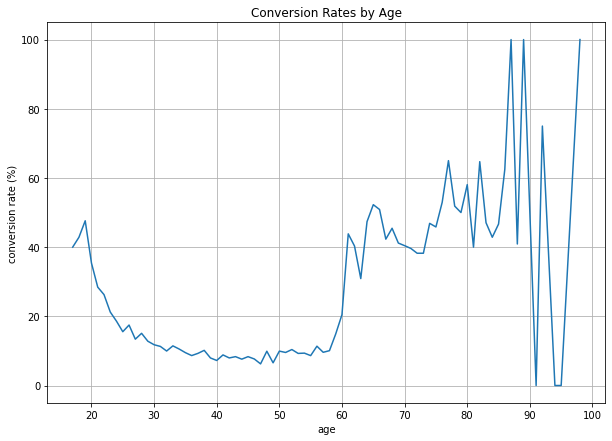

In [12]:
ax = conversions_by_age.plot(
    grid=True,
    figsize=(10,7),
    title = 'Conversion Rates by Age')

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

There seems to be a lot of noise in old age groups. Conversion rates for those who are 70 or older vary a lot and if you look at the data, this is mostly because the number of clients in this age group is relatively small, compared to other age groups.

In order to reduce this unwanted noise, we can group multiple ages together. We group the clients into ages between 18 and 30, 30 and 40, 40 and 50, 50 and 60, 60, and 70, and 70 and older. 

In [13]:
data['age_group'] = data['age'].apply(
    lambda x: '18 to 30' if x < 30 else '30 to 40' if x < 40 \
        else '40 to 50' if x < 50 else '50 to 60' if x < 60 \
        else '60 to 70' if x < 70 else '70+'
) 

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50 to 60
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50 to 60
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,30 to 40
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,40 to 50
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,50 to 60


In [15]:
pd.DataFrame(
    data.groupby(
        by='age_group'
    )['conversion'].sum()
)

,conversion
age_group,
18 to 30,922
30 to 40,1715
40 to 50,834
50 to 60,697
60 to 70,251
70+,221


In [16]:
pd.DataFrame(
    data.groupby(
        by='age_group'
    )['conversion'].count()
)

,conversion
age_group,
18 to 30,5669
30 to 40,16938
40 to 50,10526
50 to 60,6862
60 to 70,724
70+,469


Let's calculate the conversion rates for these newly created groups

In [17]:
conversions_by_age_group = data.groupby(by='age_group')['conversion'].sum() / data.groupby(by='age_group')['conversion'].count() * 100

In [18]:
pd.DataFrame(conversions_by_age_group)

,conversion
age_group,
18 to 30,16.263891
30 to 40,10.125162
40 to 50,7.923238
50 to 60,10.157389
60 to 70,34.668508
70+,47.121535


We can visualize this data using a bar plot

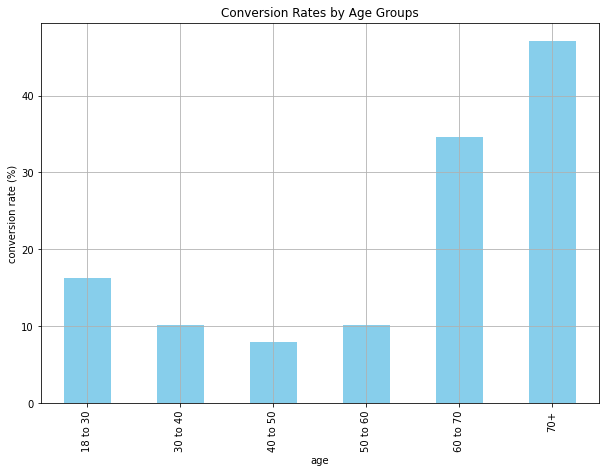

In [19]:
ax = conversions_by_age_group.loc[
    ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70+']
].plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Age Groups'
)

ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversion by campaign

Let's check conversion by campaign

In [20]:
pd.DataFrame(
    data.groupby(
        by='campaign')
    ['conversion'].sum())

,conversion
campaign,
1,2300
2,1211
3,574
4,249
5,120
6,75
7,38
8,17
9,17


In [21]:
pd.DataFrame(
    data.groupby(
        by='campaign')
    ['conversion'].count())

,conversion
campaign,
1,17642
2,10570
3,5341
4,2651
5,1599
6,979
7,629
8,400
9,283


In [22]:
conversions_by_contacts = data.groupby(
    by='campaign'
)['conversion'].sum() / data.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [23]:
pd.DataFrame(conversions_by_contacts)

,conversion
campaign,
1,13.037071
2,11.456954
3,10.747051
4,9.392682
5,7.504690
6,7.660878
7,6.041335
8,4.250000
9,6.007067


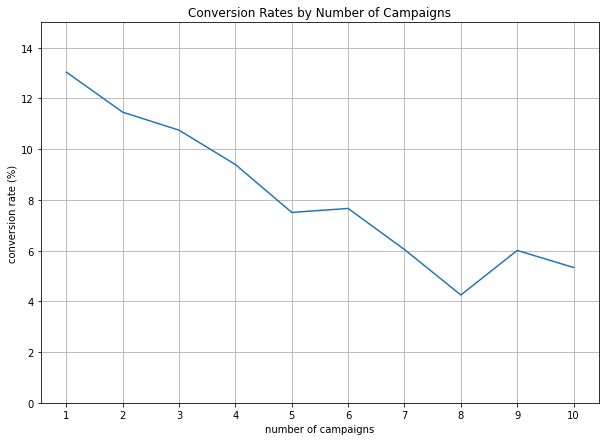

In [24]:
ax = conversions_by_contacts[:10].plot(
    grid=True,
    figsize=(10, 7),
    xticks=conversions_by_contacts.index[:10],
    title='Conversion Rates by Number of Campaigns'
)

ax.set_ylim([0, 15])
ax.set_xlabel('number of campaigns')
ax.set_ylabel('conversion rate (%)')

plt.show()

We can also look at the demographic difference between the converted clients and non-converted clients. We will compare the distributions of the marital status among the conversions and non-conversions groups.

### Marital Status 

Let's count the number of conversions and non-conversions for each marital status.

In [25]:
conversions_by_marital_status = pd.pivot_table(data, values='y', index='marital', columns='conversion', aggfunc=len)
conversions_by_marital_status.columns = ['non_conversions', 'conversions']
conversions_by_marital_status

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


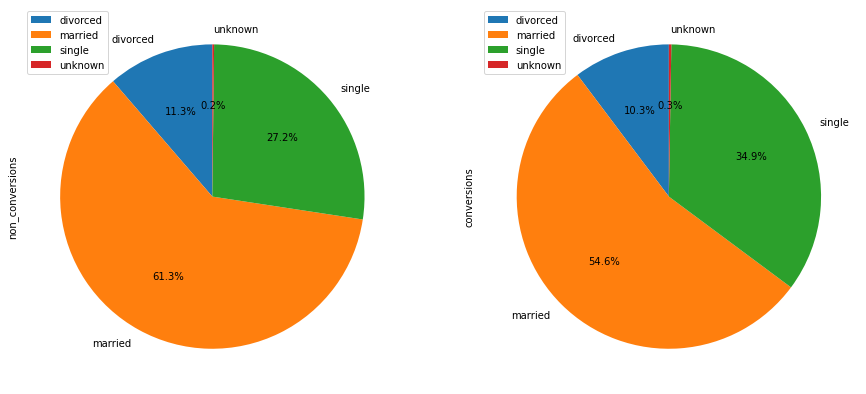

In [26]:
conversions_by_marital_status.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

### Education 

In [27]:
conversions_by_education = pd.pivot_table(data, values='y', index='education', columns='conversion', aggfunc=len)
conversions_by_education.columns = ['non_conversions', 'conversions']
conversions_by_education

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


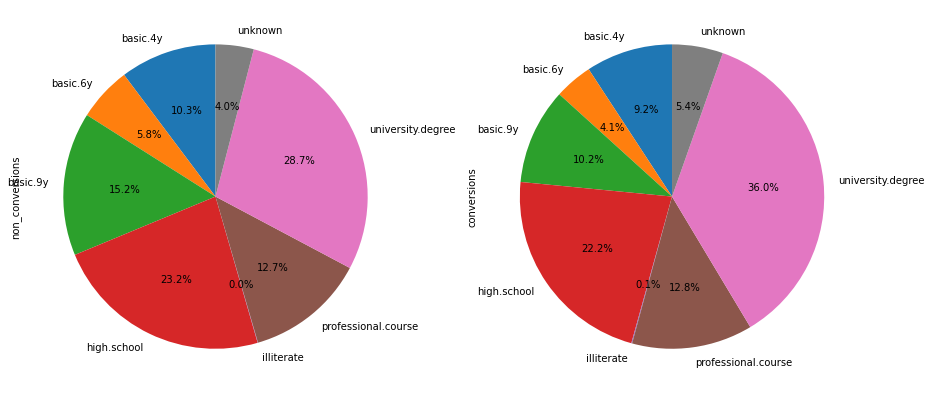

In [28]:
conversions_by_education.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()

### Last contact duration 

In [29]:
data.groupby('conversion')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
conversion,,,,,,,,
0,36548.0,220.844807,207.096293,0.0,95.0,163.5,279.00,4918.0
1,4640.0,553.191164,401.171871,37.0,253.0,449.0,741.25,4199.0


In [30]:
duration = pd.concat([
    data.loc[data['conversion'] == 1, 'duration'].reset_index(drop=True), 
    data.loc[data['conversion'] == 0, 'duration'].reset_index(drop=True)
], axis=1)

duration.columns = ['conversions', 'non_conversions']

duration = duration / (60*60)
duration

,conversions,non_conversions
0,0.437500,0.072500
1,0.289444,0.041389
2,0.407500,0.062778
3,0.160833,0.041944
4,0.128056,0.085278
...,...,...
36543,NaN,0.070556
36544,NaN,0.031111
36545,NaN,0.106389
36546,NaN,0.052500


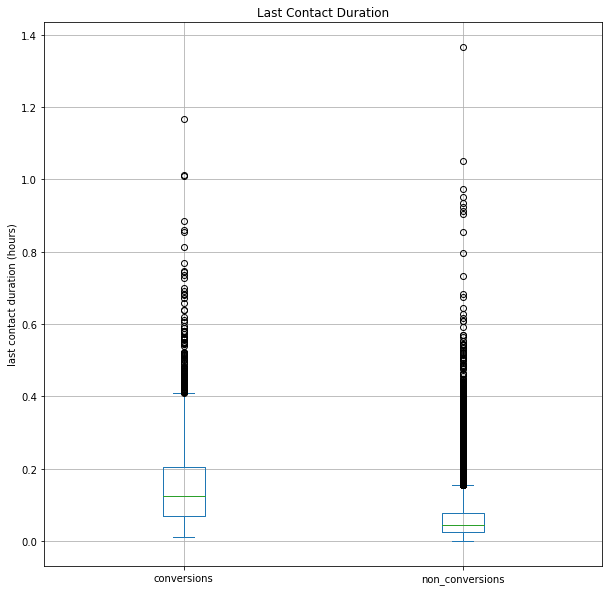

In [31]:
ax = duration.plot(
    kind='box',
    grid=True,
    figsize=(10, 10),
)

ax.set_ylabel('last contact duration (hours)')
ax.set_title('Last Contact Duration')

plt.show()

### Conversions by age group and marital status 

In [32]:
age_marital = data.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

In [33]:
age_marital = age_marital.divide(
    data.groupby(
        by='age_group'
    )['conversion'].count(), 
    axis=0
)

In [34]:
age_marital

marital,divorced,married,single,unknown
age_group,,,,
18 to 30,0.002117,0.027871,0.132475,0.000176
30 to 40,0.007557,0.052958,0.040383,0.000354
40 to 50,0.011970,0.054627,0.012350,0.000285
50 to 60,0.017342,0.077674,0.006412,0.000146
60 to 70,0.037293,0.301105,0.006906,0.001381
70+,0.136461,0.321962,0.012793,0.000000


We can now see the distribution of conversion rates based on two criteria, age group and marital status. For example, the conversion rates of clients who are single and between 18 and 30 years old is 13.25%, while the conversion rate of clients who are married and between 60 and 70 years old is 30%.

Let's visualize to make it easier to understand. In the bar chart below, we can easily see the distributions of conversion rates for each of the age and marital status groups. 

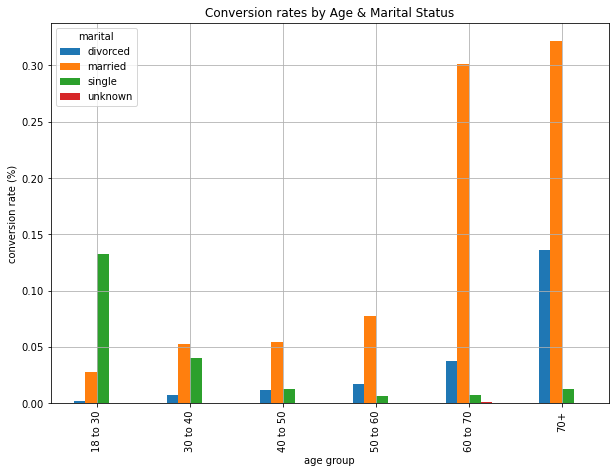

In [35]:
ax = age_marital.loc[
    ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

Let's stack the four bars for each age group 

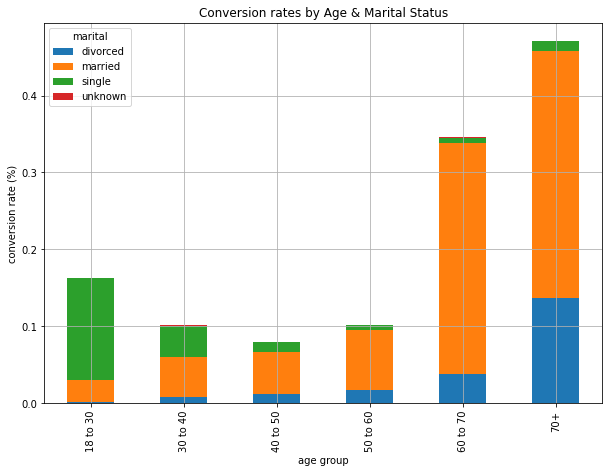

In [36]:
ax = age_marital.loc[
    ['18 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

This way, we can not only easily see the overall trends in conversion rates across different age groups, but also the proportions of converted clients with different marital statuses for each age group. 